In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

data = pd.read_csv('water.csv')

###### График:

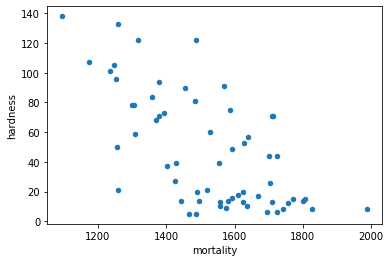

In [2]:
data.plot(kind='scatter', x='mortality', y='hardness')

###### Коэффициенты:

In [15]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [4]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [5]:
data[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


###### Модель для всех городов:

In [34]:
X = data[['mortality']]
y = data['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэффициент при х: ', model.coef_[0])
print('Смещение: ', model.intercept_)
print('Коэффициент детерминации', model.score(X_test, y_test))

Коэффициент при х:  -0.1274135464339163
Смещение:  238.02783989441798
Коэффициент детерминации 0.4417764043695329


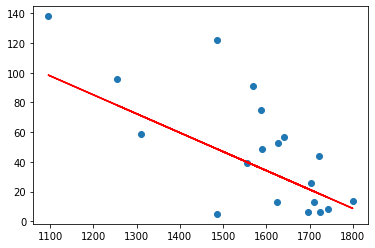

In [8]:
#Просто было интересно :)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

###### Остатки:

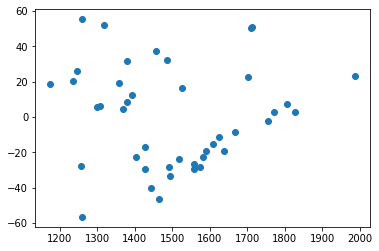

In [10]:
model = sm.OLS(y_train, X_const)
results = model.fit()
X_const = sm.add_constant(X_train)
plt.scatter(X_const.iloc[:, 1], results.resid)

Достаточно хаотично, за исключением правого нижнего угла

Статистическая зависимость вроде как есть, но кажется что смысловой вообще нет - говорить о том, что мягкая вода (более качественная) приводит к большей смертности достаточно странно.

Скореее всего, существуют другие факторы, которые косвенно влияют на жесткость воды и смертность.
Например, вода в крупных городах имеет большую жесткость так как проходит больше степеней очистки.
А смертность в круных городах меньше по причине более высокого качества медицины. А может еще почему-то.

###### Северные и Южные города по отдельности:

In [52]:
data_south = data[data['location'] == 'South']
data_north = data[data['location'] == 'North']

###### Для южных городов 

Коэффициент при х для юга:  -0.15270282328695287
Смещение для юга:  282.2108254725341
Коэффициент детерминации для юга 0.4240282745996043


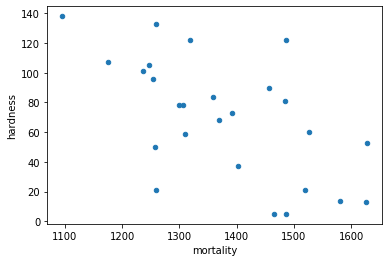

In [53]:
X = data_south[['mortality']]
y = data_south['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэффициент при х для юга: ', model.coef_[0])
print('Смещение для юга: ', model.intercept_)
print('Коэффициент детерминации для юга', model.score(X_test, y_test))

data_south.plot(kind='scatter', x='mortality', y='hardness')

В целом, некая средняя корреляция сохраняется

###### Для южных городов 

Коэффициент при х для севера:  -0.0714743198489487
Смещение для севера:  147.47985031207446
Коэффициент детерминации для севера 0.1250549676756455


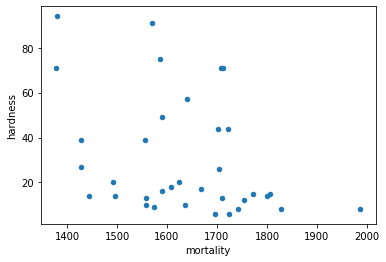

In [54]:
X = data_north[['mortality']]
y = data_north['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэффициент при х для севера: ', model.coef_[0])
print('Смещение для севера: ', model.intercept_)
print('Коэффициент детерминации для севера', model.score(X_test, y_test))

data_north.plot(kind='scatter', x='mortality', y='hardness')

Если зависимость и есть, то явно не линейная. По графину смахивает на гиперболу. При разном выборе разбиения значения коэффициента детерминации вообще уходят в отрицательные значения. Такая-себе модель